# Contas Nacionais Trimestrais

In [1]:
!pip install sidrapy

In [2]:
import pandas as pd
import numpy as np
import sidrapy as sidra
import matplotlib.pyplot as plt
import seaborn as sns
from cycler import cycler

In [3]:
plt.style.use('bmh')


# paleta: verde-escuro e dourado queimado
custom_colors = ['#264653', '#E9C46A']

# Aplicar como padrão global no notebook
plt.rcParams['axes.prop_cycle'] = cycler(color=custom_colors)

plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = '#333333'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.color'] = '#CCCCCC'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

In [4]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

# Coleta e tratamento de dados

## PIB Com Ajuste Sazonal tabela 1621

In [5]:

pib_sa_raw = sidra.get_table(table_code= "1621",
                            territorial_level = "1",
                            ibge_territorial_code = "all",
                            period = "all",
                            classification = "11255/90707")




In [6]:
pib_sa_raw.columns = pib_sa_raw.iloc[0]
pib_sa_raw.head(5)

,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Brasil (Código),Brasil,Trimestre (Código),Trimestre,Setores e subsetores (Código),Setores e subsetores,Variável (Código),Variável
0,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Brasil (Código),Brasil,Trimestre (Código),Trimestre,Setores e subsetores (Código),Setores e subsetores,Variável (Código),Variável
1,1,Brasil,30,Número-índice,99.41,1,Brasil,199601,1º trimestre 1996,90707,PIB a preços de mercado,584,Série encadeada do índice de volume trimestral...
2,1,Brasil,30,Número-índice,100.59,1,Brasil,199602,2º trimestre 1996,90707,PIB a preços de mercado,584,Série encadeada do índice de volume trimestral...
3,1,Brasil,30,Número-índice,104.31,1,Brasil,199603,3º trimestre 1996,90707,PIB a preços de mercado,584,Série encadeada do índice de volume trimestral...
4,1,Brasil,30,Número-índice,103.31,1,Brasil,199604,4º trimestre 1996,90707,PIB a preços de mercado,584,Série encadeada do índice de volume trimestral...


In [7]:
pib_sa_raw['Valor'][0]

'Valor'

In [8]:
pib_sa_raw2 = pib_sa_raw.iloc[1:, :].copy()
pib_sa_raw2.head(3)

,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Brasil (Código),Brasil,Trimestre (Código),Trimestre,Setores e subsetores (Código),Setores e subsetores,Variável (Código),Variável
1,1,Brasil,30,Número-índice,99.41,1,Brasil,199601,1º trimestre 1996,90707,PIB a preços de mercado,584,Série encadeada do índice de volume trimestral...
2,1,Brasil,30,Número-índice,100.59,1,Brasil,199602,2º trimestre 1996,90707,PIB a preços de mercado,584,Série encadeada do índice de volume trimestral...
3,1,Brasil,30,Número-índice,104.31,1,Brasil,199603,3º trimestre 1996,90707,PIB a preços de mercado,584,Série encadeada do índice de volume trimestral...


In [9]:
type(pib_sa_raw2['Valor'][1])

pib_sa_raw2['Valor'] = pib_sa_raw2['Valor'].astype(float)

type(pib_sa_raw2['Valor'][1])


numpy.float64

In [10]:
pib_sa = pib_sa_raw2.rename(columns = {"Valor" : "pib_sa",
                                "Trimestre (Código)" : "date"})[['pib_sa', 'date']]

In [11]:
pib_sa['date'].head(3)

,date
1,199601
2,199602
3,199603


In [12]:
pib_sa['date'] = pib_sa['date'].str[:-2] + pib_sa['date'].str[-2:].replace({"01" : "03",
                                                                  "02" : "06",
                                                                  "03" : "09",
                                                                  "04" : "12"})

In [13]:
pib_sa.head(3)

,pib_sa,date
1,99.41,199603
2,100.59,199606
3,104.31,199609


In [14]:
pib_sa.index = pd.to_datetime(pib_sa['date'],
                              format = "%Y%m")



In [15]:
pib_sa = pib_sa.drop(columns = ['date'])


In [16]:
pib_sa.head(4)

,pib_sa
date,
1996-03-01,99.41
1996-06-01,100.59
1996-09-01,104.31
1996-12-01,103.31


In [17]:
pib_sa['var_marginal'] = pib_sa['pib_sa'].pct_change() * 100
pib_sa.head(5)

,pib_sa,var_marginal
date,,
1996-03-01,99.41,NaN
1996-06-01,100.59,1.187003
1996-09-01,104.31,3.698181
1996-12-01,103.31,-0.958681
1997-03-01,104.42,1.074436


In [18]:
pib_sa.dropna(inplace= True)


## 	PIB Sem ajuste SazonalTabela 1620


In [19]:
pib_raw = sidra.get_table(table_code= "1620",
                            territorial_level = "1",
                            ibge_territorial_code = "all",
                            period = "all",
                            classification = "11255/90707")

pib_raw.head(5)



,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N,D4C,D4N
0,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Brasil (Código),Brasil,Trimestre (Código),Trimestre,Setores e subsetores (Código),Setores e subsetores,Variável (Código),Variável
1,1,Brasil,30,Número-índice,96.84,1,Brasil,199601,1º trimestre 1996,90707,PIB a preços de mercado,583,Série encadeada do índice de volume trimestral...
2,1,Brasil,30,Número-índice,100.12,1,Brasil,199602,2º trimestre 1996,90707,PIB a preços de mercado,583,Série encadeada do índice de volume trimestral...
3,1,Brasil,30,Número-índice,107.56,1,Brasil,199603,3º trimestre 1996,90707,PIB a preços de mercado,583,Série encadeada do índice de volume trimestral...
4,1,Brasil,30,Número-índice,104.31,1,Brasil,199604,4º trimestre 1996,90707,PIB a preços de mercado,583,Série encadeada do índice de volume trimestral...


In [20]:
pib_raw.columns = pib_raw.iloc[0]
pib_raw.head(5)

,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Brasil (Código),Brasil,Trimestre (Código),Trimestre,Setores e subsetores (Código),Setores e subsetores,Variável (Código),Variável
0,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Brasil (Código),Brasil,Trimestre (Código),Trimestre,Setores e subsetores (Código),Setores e subsetores,Variável (Código),Variável
1,1,Brasil,30,Número-índice,96.84,1,Brasil,199601,1º trimestre 1996,90707,PIB a preços de mercado,583,Série encadeada do índice de volume trimestral...
2,1,Brasil,30,Número-índice,100.12,1,Brasil,199602,2º trimestre 1996,90707,PIB a preços de mercado,583,Série encadeada do índice de volume trimestral...
3,1,Brasil,30,Número-índice,107.56,1,Brasil,199603,3º trimestre 1996,90707,PIB a preços de mercado,583,Série encadeada do índice de volume trimestral...
4,1,Brasil,30,Número-índice,104.31,1,Brasil,199604,4º trimestre 1996,90707,PIB a preços de mercado,583,Série encadeada do índice de volume trimestral...


In [21]:
pib_raw2 = pib_raw.iloc[1:,:].copy()
pib_raw2.head()

,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Brasil (Código),Brasil,Trimestre (Código),Trimestre,Setores e subsetores (Código),Setores e subsetores,Variável (Código),Variável
1,1,Brasil,30,Número-índice,96.84,1,Brasil,199601,1º trimestre 1996,90707,PIB a preços de mercado,583,Série encadeada do índice de volume trimestral...
2,1,Brasil,30,Número-índice,100.12,1,Brasil,199602,2º trimestre 1996,90707,PIB a preços de mercado,583,Série encadeada do índice de volume trimestral...
3,1,Brasil,30,Número-índice,107.56,1,Brasil,199603,3º trimestre 1996,90707,PIB a preços de mercado,583,Série encadeada do índice de volume trimestral...
4,1,Brasil,30,Número-índice,104.31,1,Brasil,199604,4º trimestre 1996,90707,PIB a preços de mercado,583,Série encadeada do índice de volume trimestral...
5,1,Brasil,30,Número-índice,100.13,1,Brasil,199701,1º trimestre 1997,90707,PIB a preços de mercado,583,Série encadeada do índice de volume trimestral...


In [22]:
pib_raw2['Valor'] = pib_raw2['Valor'].astype(float)

In [23]:
pib_raw2.columns

Index(['Nível Territorial (Código)', 'Nível Territorial',
       'Unidade de Medida (Código)', 'Unidade de Medida', 'Valor',
       'Brasil (Código)', 'Brasil', 'Trimestre (Código)', 'Trimestre',
       'Setores e subsetores (Código)', 'Setores e subsetores',
       'Variável (Código)', 'Variável'],
      dtype='object', name=0)

In [24]:
pib = pib_raw2.rename(columns= {'Valor':'pib', 'Trimestre (Código)': 'date'})[['pib','date']]

pib.head(5)


,pib,date
1,96.84,199601
2,100.12,199602
3,107.56,199603
4,104.31,199604
5,100.13,199701


In [25]:
pib['date'] = pib['date'].str[:-2] + pib['date'].str[-2:].replace({'01': '03',
                                                     '02' : '06',
                                                     '03' : '09',
                                                     '04' : '12'})

pib.index = pd.to_datetime(pib['date'], format='%Y%m')

pib.head(4)

,pib,date
date,,
1996-03-01,96.84,199603
1996-06-01,100.12,199606
1996-09-01,107.56,199609
1996-12-01,104.31,199612


In [26]:
pib = pib.drop('date',axis=1)
pib.head(5)

,pib
date,
1996-03-01,96.84
1996-06-01,100.12
1996-09-01,107.56
1996-12-01,104.31
1997-03-01,100.13


In [27]:
pib['lag4'] = pib['pib'].shift(4)
pib['var_interanual'] = ( (pib['pib'] / pib['lag4'])  - 1 ) * 100
pib.head(5)

,pib,lag4,var_interanual
date,,,
1996-03-01,96.84,NaN,NaN
1996-06-01,100.12,NaN,NaN
1996-09-01,107.56,NaN,NaN
1996-12-01,104.31,NaN,NaN
1997-03-01,100.13,96.84,3.397356


In [28]:
def acum_i(data, n):
    media_movel = data.rolling(window=n).mean()
    media_movel_lag = media_movel.shift(n)
    acumulado = ((media_movel / media_movel_lag) - 1) * 100
    return acumulado

In [29]:
pib['var_anual'] = acum_i(pib['pib'], 4)
pib.head()

,pib,lag4,var_interanual,var_anual
date,,,,
1996-03-01,96.84,NaN,NaN,NaN
1996-06-01,100.12,NaN,NaN,NaN
1996-09-01,107.56,NaN,NaN,NaN
1996-12-01,104.31,NaN,NaN,NaN
1997-03-01,100.13,96.84,3.397356,NaN


In [30]:
pib.dropna(inplace= True)
pib.head(5)

,pib,lag4,var_interanual,var_anual
date,,,,
1997-12-01,108.21,104.31,3.738855,3.395054
1998-03-01,101.14,100.13,1.008689,2.814714
1998-06-01,106.46,104.88,1.506484,2.019766
1998-09-01,109.88,109.49,0.356197,1.642750
1998-12-01,106.66,108.21,-1.432400,0.338293


In [31]:
pib.head()

,pib,lag4,var_interanual,var_anual
date,,,,
1997-12-01,108.21,104.31,3.738855,3.395054
1998-03-01,101.14,100.13,1.008689,2.814714
1998-06-01,106.46,104.88,1.506484,2.019766
1998-09-01,109.88,109.49,0.356197,1.642750
1998-12-01,106.66,108.21,-1.432400,0.338293


In [32]:
tabela_pib = pib_sa.join(pib,how= 'inner')
tabela_pib.head(5)

,pib_sa,var_marginal,pib,lag4,var_interanual,var_anual
date,,,,,,
1997-12-01,107.16,0.837489,108.21,104.31,3.738855,3.395054
1998-03-01,105.05,-1.969018,101.14,100.13,1.008689,2.814714
1998-06-01,106.84,1.703950,106.46,104.88,1.506484,2.019766
1998-09-01,106.81,-0.028079,109.88,109.49,0.356197,1.642750
1998-12-01,105.58,-1.151578,106.66,108.21,-1.432400,0.338293


In [33]:
tabela_pib.drop('lag4', axis=1 ,inplace= True)

## Tabela PIB

In [34]:
tabela_pib.tail().sort_index(ascending= False)

,pib_sa,var_marginal,pib,var_interanual,var_anual
date,,,,,
2025-03-01,193.76,1.397247,190.65,2.853906,3.465380
2024-12-01,191.09,0.052359,189.51,3.613997,3.396031
2024-09-01,190.99,0.802238,194.94,4.051241,3.092939
2024-06-01,189.47,1.472793,190.43,3.337313,2.659933
2024-03-01,186.72,0.962474,185.36,2.556158,2.779630


## vizualização do PIB

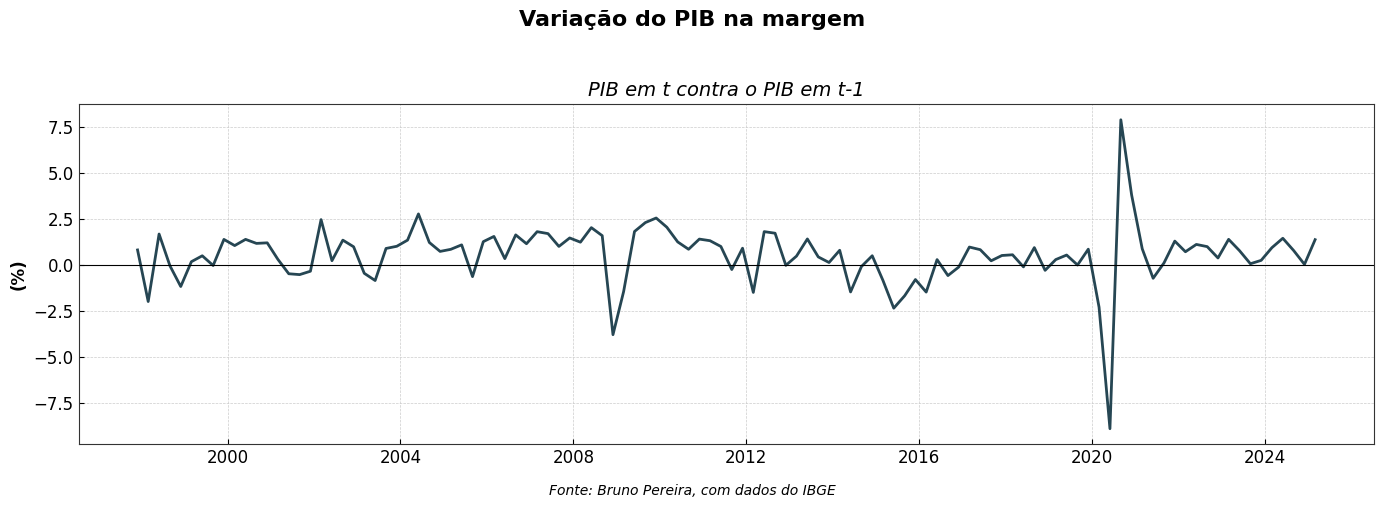

In [35]:
fig, ax = plt.subplots(figsize=(14, 5))

# Plot
ax.plot(tabela_pib['var_marginal'], color= '#264653', linewidth = 2)

ax.axhline(0, color='black', linewidth=0.8)


ax.set_ylabel('(%)', fontweight='bold')


fig.suptitle('Variação do PIB na margem', fontsize=16, fontweight='bold')



ax.set_title('PIB em t contra o PIB em t-1', fontsize=14, style='italic')

fig.text(0.5, 0.01, 'Fonte: Bruno Pereira, com dados do IBGE',
         ha='center', fontsize=10, style='italic')


plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


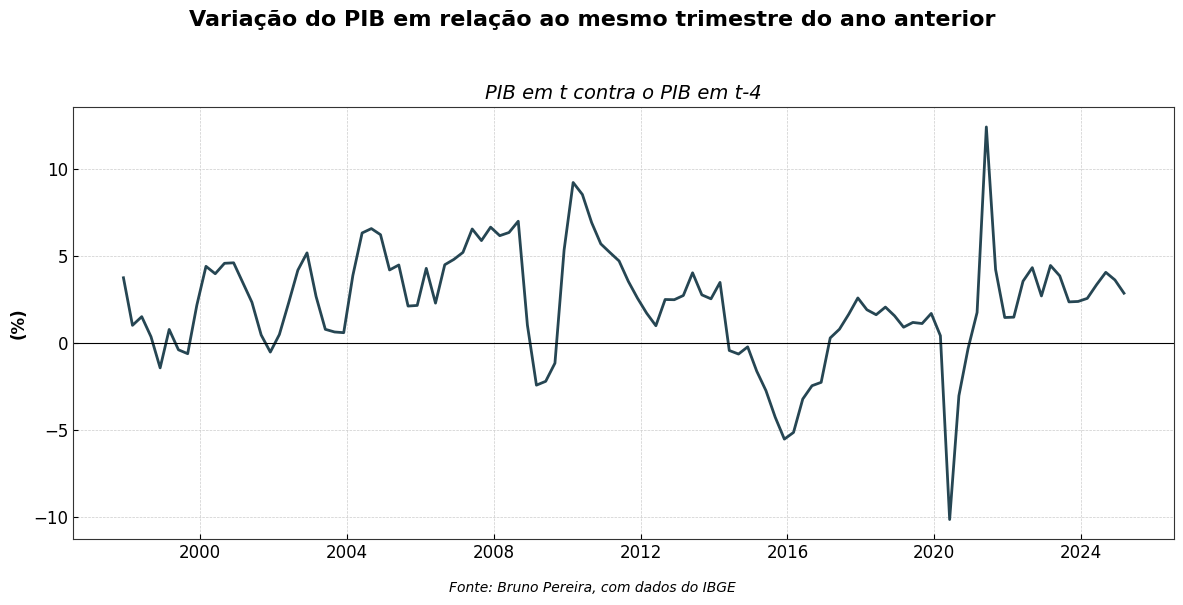

In [36]:
fig , ax = plt.subplots(figsize= (12,6))

ax.plot(tabela_pib['var_interanual'], color= '#264653', linewidth = 2)

ax.axhline(0, color='black', linewidth=0.8)


fig.suptitle('Variação do PIB em relação ao mesmo trimestre do ano anterior', fontweight= 'bold', fontsize= 16)

ax.set_title('PIB em t contra o PIB em t-4', fontweight = 14, style = 'italic')
ax.set_ylabel('(%)', fontweight='bold')

fig.text(0.5, 0.01, 'Fonte: Bruno Pereira, com dados do IBGE', ha='center', fontsize= 10, style ='italic')

plt.tight_layout(rect=[0,0.03,1,0.95])

plt.show()


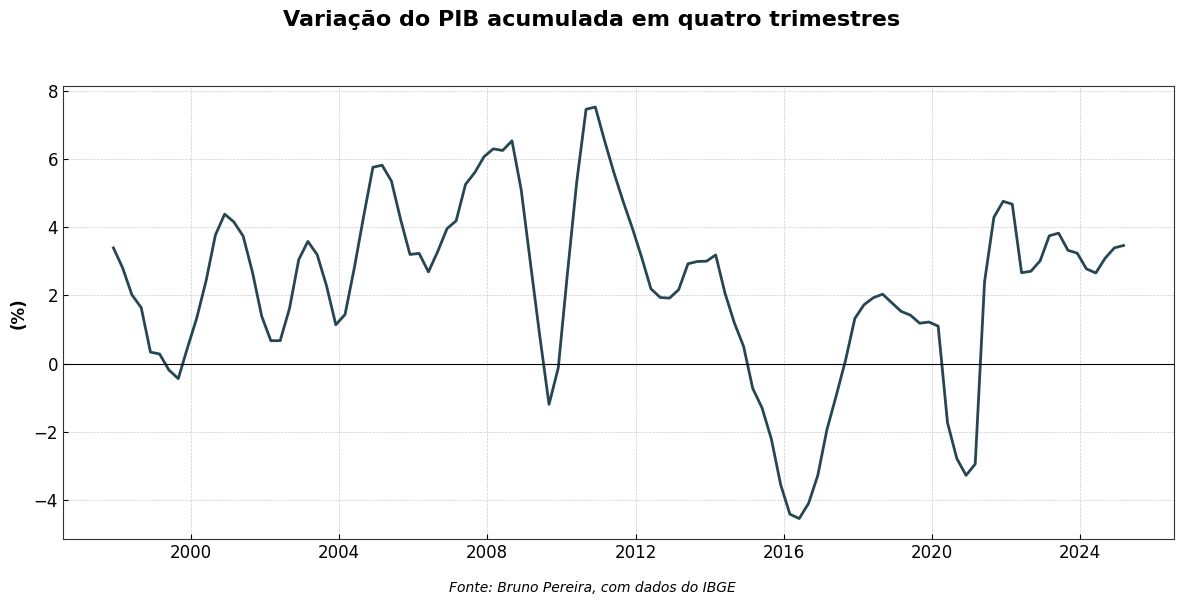

In [37]:
fig , ax = plt.subplots(figsize= (12,6))

ax.plot(tabela_pib['var_anual'], color= '#264653' , linewidth = 2)

fig.suptitle('Variação do PIB acumulada em quatro trimestres', fontweight= 'bold', fontsize= 16)
ax.set_ylabel('(%)', fontweight='bold')

ax.axhline(0, color='black', linewidth=0.8)


fig.text(0.5, 0.01, 'Fonte: Bruno Pereira, com dados do IBGE', ha='center', fontsize= 10, style ='italic')

plt.tight_layout(rect=[0,0.03,1,0.95])

plt.show()

# PIB e seus componentes

In [38]:
pib_sa_comp_raw = sidra.get_table(table_code= '1621', territorial_level= "1", ibge_territorial_code="all", period= "all",
                                  classifications = {
                    "11255": "90687,90691,90696,90707,93404,93405,93406,93407,93408"
                    })

pib_sa_comp_raw.head(5)

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N,D4C,D4N
0,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Brasil (Código),Brasil,Trimestre (Código),Trimestre,Setores e subsetores (Código),Setores e subsetores,Variável (Código),Variável
1,1,Brasil,30,Número-índice,95.23,1,Brasil,199601,1º trimestre 1996,90687,Agropecuária - total,584,Série encadeada do índice de volume trimestral...
2,1,Brasil,30,Número-índice,99.83,1,Brasil,199601,1º trimestre 1996,90691,Indústria - total,584,Série encadeada do índice de volume trimestral...
3,1,Brasil,30,Número-índice,102.00,1,Brasil,199601,1º trimestre 1996,90696,Serviços - total,584,Série encadeada do índice de volume trimestral...
4,1,Brasil,30,Número-índice,99.41,1,Brasil,199601,1º trimestre 1996,90707,PIB a preços de mercado,584,Série encadeada do índice de volume trimestral...


In [39]:
pib_sa_comp_raw.columns = pib_sa_comp_raw.iloc[0]
pib_sa_comp_raw.head(4)

,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Brasil (Código),Brasil,Trimestre (Código),Trimestre,Setores e subsetores (Código),Setores e subsetores,Variável (Código),Variável
0,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Brasil (Código),Brasil,Trimestre (Código),Trimestre,Setores e subsetores (Código),Setores e subsetores,Variável (Código),Variável
1,1,Brasil,30,Número-índice,95.23,1,Brasil,199601,1º trimestre 1996,90687,Agropecuária - total,584,Série encadeada do índice de volume trimestral...
2,1,Brasil,30,Número-índice,99.83,1,Brasil,199601,1º trimestre 1996,90691,Indústria - total,584,Série encadeada do índice de volume trimestral...
3,1,Brasil,30,Número-índice,102.00,1,Brasil,199601,1º trimestre 1996,90696,Serviços - total,584,Série encadeada do índice de volume trimestral...


In [40]:
pib_sa_comp_raw2 = pib_sa_comp_raw.iloc[1:, :].copy()

pib_sa_comp_raw2.head(5)

,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Brasil (Código),Brasil,Trimestre (Código),Trimestre,Setores e subsetores (Código),Setores e subsetores,Variável (Código),Variável
1,1,Brasil,30,Número-índice,95.23,1,Brasil,199601,1º trimestre 1996,90687,Agropecuária - total,584,Série encadeada do índice de volume trimestral...
2,1,Brasil,30,Número-índice,99.83,1,Brasil,199601,1º trimestre 1996,90691,Indústria - total,584,Série encadeada do índice de volume trimestral...
3,1,Brasil,30,Número-índice,102.00,1,Brasil,199601,1º trimestre 1996,90696,Serviços - total,584,Série encadeada do índice de volume trimestral...
4,1,Brasil,30,Número-índice,99.41,1,Brasil,199601,1º trimestre 1996,90707,PIB a preços de mercado,584,Série encadeada do índice de volume trimestral...
5,1,Brasil,30,Número-índice,98.87,1,Brasil,199601,1º trimestre 1996,93404,Despesa de consumo das famílias,584,Série encadeada do índice de volume trimestral...


In [43]:
pib_sa_comp_raw2['Valor'] =   pib_sa_comp_raw2['Valor'].astype(float)

In [45]:
pib_sa_comp_raw2.rename(columns = {"Trimestre (Código)": 'date'}, inplace= True)


In [46]:
pib_sa_comp_raw2.columns

Index(['Nível Territorial (Código)', 'Nível Territorial',
       'Unidade de Medida (Código)', 'Unidade de Medida', 'Valor',
       'Brasil (Código)', 'Brasil', 'date', 'Trimestre',
       'Setores e subsetores (Código)', 'Setores e subsetores',
       'Variável (Código)', 'Variável'],
      dtype='object', name=0)

In [49]:
pib_sa_comp = pib_sa_comp_raw2[['date', 'Valor', 'Setores e subsetores']].copy()

In [58]:
pib_sa_comp['date'] = pib_sa_comp['date'].str[:-2] +  pib_sa_comp['date'].str[-2:].replace({"01" : "03",
                                                                      "02" : "06",
                                                                      "03" : "09",
                                                                       "04" : "12"})

In [59]:
pib_sa_comp['date'] = pd.to_datetime(pib_sa_comp['date'], format= "%Y%m")
pib_sa_comp.head(5)

,date,Valor,Setores e subsetores
1,1996-03-01,95.23,Agropecuária - total
2,1996-03-01,99.83,Indústria - total
3,1996-03-01,102.00,Serviços - total
4,1996-03-01,99.41,PIB a preços de mercado
5,1996-03-01,98.87,Despesa de consumo das famílias


In [61]:
pib_sa_comp.set_index('date', inplace= True)

In [66]:
dados = list(

             map(
                 lambda tabela, variavel: ( sidra.get_table( table_code= tabela,
                                                            territorial_level= "1", ibge_territorial_code= "all",
                                                             variable= variavel,
                                                             classifications = {
                    "11255": "90687,90691,90696,90707,93404,93405,93406,93407,93408"

                                                             } , period= "all")) ,
        ["1620", "1621", "1846", "6612", "6613"],

        ["583", "584", "585", "9318", "9319"]


             )
)

#dados

In [67]:
df_ctn = (
    pd.concat(
        objs=dados,
        keys=["num_indice", "num_indice_sa", "precos_correntes",
              "precos_constantes", "precos_constantes_sa"],
        names=["tabela", "linha"]
    )
    .reset_index()
    .rename(columns=dados[0].iloc[0])
    .query("Trimestre != 'Trimestre'")
    .rename(columns={
        "Trimestre (Código)": "data",
        "Setores e subsetores": "setores",
        "Valor": "valor"
    })
    .filter(items=["tabela", "data", "setores", "valor"], axis="columns")
    .replace({
        "setores": {
            "Agropecuária - total": "Agropecuária",
            "Indústria - total": "Indústria",
            "Serviços - total": "Serviços",
            "PIB a preços de mercado": "PIB",
            "Despesa de consumo das famílias": "Consumo das Famílias",
            "Despesa de consumo da administração pública": "Despesa do Governo",
            "Formação bruta de capital fixo": "FBFC",
            "Exportação de bens e serviços": "Exportação",
            "Importação de bens e serviços (-)": "Importação"
        }
    })
    .assign(
        data=lambda x: pd.PeriodIndex(
            x['data'].astype(str).str.slice_replace(start=4, stop=5, repl='Q'),
            freq='Q'
        ).to_timestamp(),
        valor=lambda x: x['valor'].astype(float)
    )
)

df_ctn.head()


,tabela,data,setores,valor
1,num_indice,1996-01-01,Agropecuária,105.32
2,num_indice,1996-01-01,Indústria,93.19
3,num_indice,1996-01-01,Serviços,98.31
4,num_indice,1996-01-01,PIB,96.84
5,num_indice,1996-01-01,Consumo das Famílias,96.06


In [68]:

taxas = (
    df_ctn.query("tabela in ['num_indice', 'num_indice_sa']")
    .pivot(index = ["data", "setores"], columns = "tabela", values = "valor")
    .reset_index()
    .sort_values("data")
    )

taxas["var_margem"] = (
    taxas.groupby("setores", group_keys=False)["num_indice_sa"]
    .apply(lambda x: x.pct_change(1) * 100)
)
taxas["var_interanual"] = (
    taxas.groupby("setores", group_keys=False)["num_indice"]
    .apply(lambda x: x.pct_change(4) * 100)
)
taxas["var_anual"] = (
    taxas.groupby("setores", group_keys=False)["num_indice"]
    .apply(lambda x: (x.rolling(4).sum() / x.rolling(4).sum().shift(4) - 1) * 100)
)
taxas["ano"] = taxas["data"].dt.year
taxas["num_indice_acum"] = (
    taxas.groupby(["setores", "ano"], group_keys=False)["num_indice"]
    .apply(lambda x: x.cumsum())
    )
taxas["var_acum_ano"] = (
    taxas.groupby("setores", group_keys=False)["num_indice_acum"]
    .apply(lambda x: x.pct_change(4) * 100)
)
taxas.head(10)

tabela,data,setores,num_indice,num_indice_sa,var_margem,var_interanual,var_anual,ano,num_indice_acum,var_acum_ano
0,1996-01-01,Agropecuária,105.32,95.23,NaN,NaN,NaN,1996,105.32,NaN
1,1996-01-01,Consumo das Famílias,96.06,98.87,NaN,NaN,NaN,1996,96.06,NaN
2,1996-01-01,Despesa do Governo,96.12,99.16,NaN,NaN,NaN,1996,96.12,NaN
3,1996-01-01,Exportação,95.16,99.68,NaN,NaN,NaN,1996,95.16,NaN
4,1996-01-01,FBFC,92.91,96.71,NaN,NaN,NaN,1996,92.91,NaN
...,...,...,...,...,...,...,...,...,...,...
1047,2025-01-01,Exportação,350.46,378.51,2.909111,1.180818,1.774446,2025,350.46,1.180818
1048,2025-01-01,FBFC,181.71,186.10,3.131061,9.141690,8.797052,2025,181.71,9.141690
1049,2025-01-01,Importação,308.43,323.01,5.908390,14.043261,15.612754,2025,308.43,14.043261
1050,2025-01-01,Indústria,137.78,144.28,-0.055417,2.400595,3.124217,2025,137.78,2.400595


In [71]:

pib_comp  = (
    taxas.query("data == data.max()")
    .filter(
        items = ["setores", "var_margem", "var_interanual", "var_anual", "var_acum_ano"],
        axis = "columns"
        )
    .rename(columns = {
        "var_margem": "Var. % margem",
        "var_interanual": "Var. % interanual",
         "var_anual": "Var. % anual",
         "var_acum_ano": "Var. % acumulada no ano"
         }
         )
    .set_index("setores")
    )
pib_comp.head()

,Var. % margem,Var. % interanual,Var. % anual,Var. % acumulada no ano
setores,,,,
PIB,1.397247,2.853906,3.465380,2.853906
Agropecuária,12.244659,10.170940,1.819187,10.170940
Consumo das Famílias,1.038707,2.553626,4.215212,2.553626
Despesa do Governo,0.068124,1.140437,1.195909,1.140437
Exportação,2.909111,1.180818,1.774446,1.180818


In [72]:
taxas.head()

tabela,data,setores,num_indice,num_indice_sa,var_margem,var_interanual,var_anual,ano,num_indice_acum,var_acum_ano
0,1996-01-01,Agropecuária,105.32,95.23,NaN,NaN,NaN,1996,105.32,NaN
1,1996-01-01,Consumo das Famílias,96.06,98.87,NaN,NaN,NaN,1996,96.06,NaN
2,1996-01-01,Despesa do Governo,96.12,99.16,NaN,NaN,NaN,1996,96.12,NaN
3,1996-01-01,Exportação,95.16,99.68,NaN,NaN,NaN,1996,95.16,NaN
4,1996-01-01,FBFC,92.91,96.71,NaN,NaN,NaN,1996,92.91,NaN


In [74]:
df_agro =  taxas[taxas['setores'] == 'Agropecuária'].copy()

df_agro.head()

tabela,data,setores,num_indice,num_indice_sa,var_margem,var_interanual,var_anual,ano,num_indice_acum,var_acum_ano
0,1996-01-01,Agropecuária,105.32,95.23,NaN,NaN,NaN,1996,105.32,NaN
9,1996-04-01,Agropecuária,105.50,96.59,1.428121,NaN,NaN,1996,210.82,NaN
18,1996-07-01,Agropecuária,108.10,101.75,5.342168,NaN,NaN,1996,318.92,NaN
27,1996-10-01,Agropecuária,92.89,125.83,23.665848,NaN,NaN,1996,411.81,NaN
36,1997-01-01,Agropecuária,112.67,101.86,-19.049511,6.978731,NaN,1997,112.67,6.978731


In [75]:
df_agro.dropna(inplace= True)

In [76]:
df_agro.set_index("data", inplace= True)

In [77]:
df_agro.head()

tabela,setores,num_indice,num_indice_sa,var_margem,var_interanual,var_anual,ano,num_indice_acum,var_acum_ano
data,,,,,,,,,
1997-10-01,Agropecuária,82.64,112.59,8.646145,-11.034557,0.813482,1997,415.16,0.813482
1998-01-01,Agropecuária,111.07,100.15,-11.048939,-1.420076,-1.336005,1998,111.07,-1.420076
1998-04-01,Agropecuária,124.57,112.71,12.541188,13.080973,0.979189,1998,235.64,5.748777
1998-07-01,Agropecuária,115.41,109.75,-2.626209,5.214696,1.946358,1998,351.05,5.572597
1998-10-01,Agropecuária,78.27,107.49,-2.059226,-5.287996,3.410733,1998,429.32,3.410733


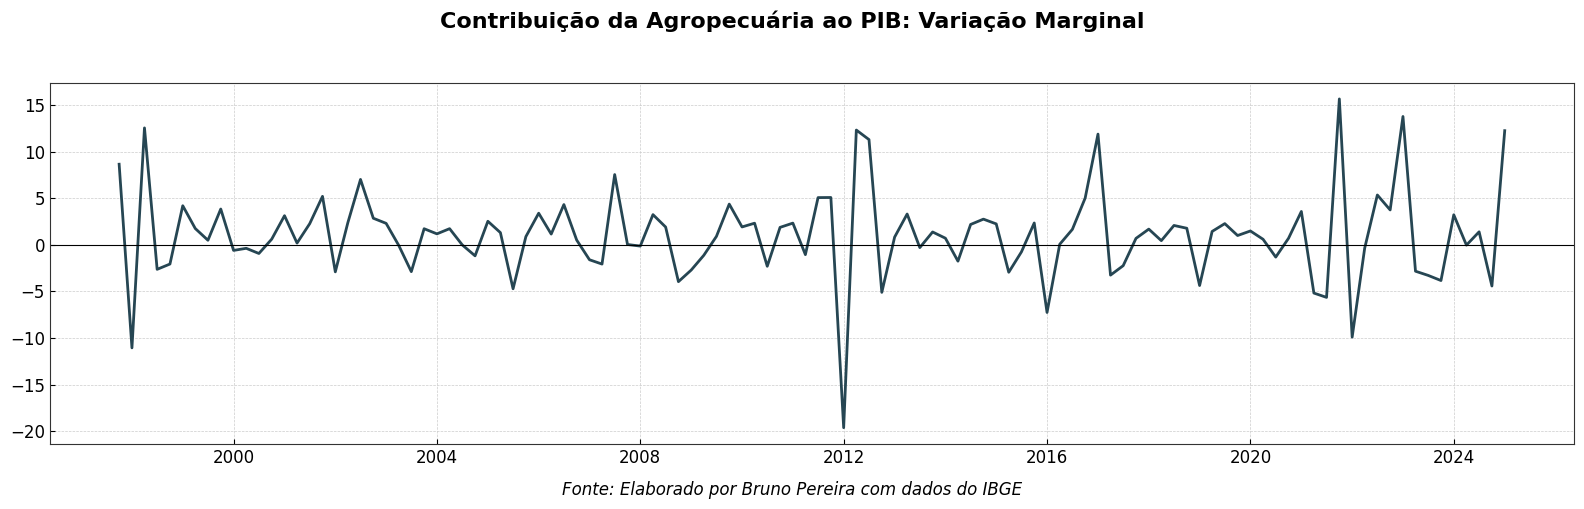

In [87]:
fig, ax = plt.subplots(figsize= (16,5))

ax.plot(df_agro['var_margem'], linewidth=2)

fig.suptitle('Contribuição da Agropecuária ao PIB: Variação Marginal', fontsize=16, fontweight='bold')


ax.axhline(0, color='black', linewidth=0.8)

fig.text(0.5, 0.01, "Fonte: Elaborado por Bruno Pereira com dados do IBGE", ha='center', style='italic', fontsize=12)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

